# Praproses, Ektraksi Fitur,


## Persiapan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

root = "/content/drive/MyDrive/Colab Notebooks/PBL KEL 5 SEM 5/fruit-clean/Training"
X_train = []
y_train = []

for class_name in os.listdir(root):
    class_folder = os.path.join(root, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, file))
        img = cv2.resize(img, (128, 128))

        X_train.append(img)
        y_train.append(class_name)


In [ ]:
import os
import cv2

root = "/content/drive/MyDrive/Colab Notebooks/PBL KEL 5 SEM 5/fruit-clean/Test"
X_test = []
y_test = []

for class_name in os.listdir(root):
    class_folder = os.path.join(root, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, file))
        img = cv2.resize(img, (128, 128))

        X_test.append(img)
        y_test.append(class_name)


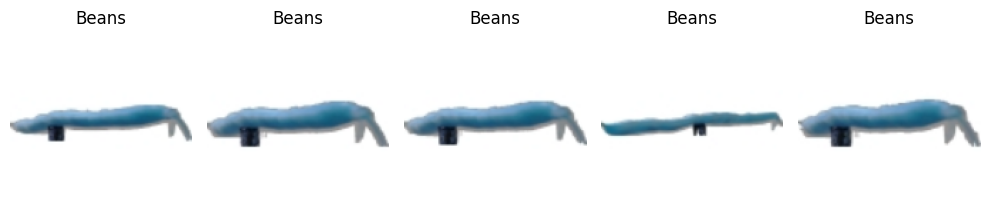

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Praproses

### Normalisasi Piksel

In [ ]:
import numpy as np

X_train = np.array(X_train).astype(np.float32) / 255.0

In [ ]:
X_test = np.array(X_test).astype(np.float32) / 255.0

### Konversi ke Grayscale

In [ ]:
X_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_test])

In [ ]:
X_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_train])

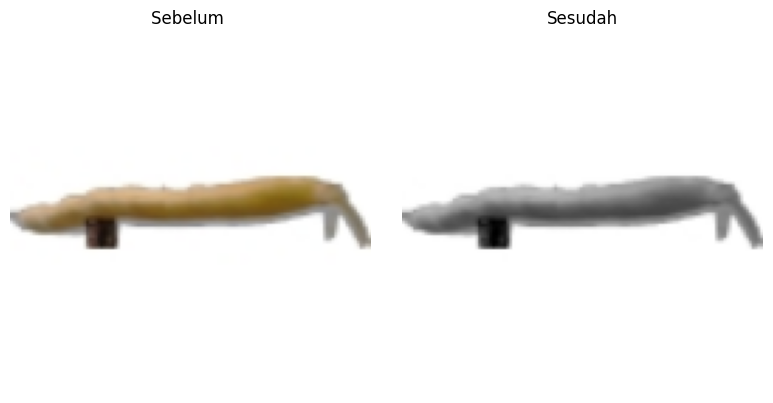

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_color = X_train[0]
img_gray = X_train_gray[0]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Sebelum ")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Sesudah")
plt.axis("off")

plt.tight_layout()
plt.show()


### Persiapan lainnya

#### Segmentasi

Dataset citra yang digunakan telah memiliki segmentasi objek yang baik, sehingga objek utama pada setiap gambar terlihat jelas dan terfokus.

#### Augmentasi

Dataset citra yang digunakan memiliki jumlah data yang cukup besar, sehingga proses augmentasi data tidak diperlukan dalam penelitian ini.

## Ekstraksi Fitur

### Local Binary Pattern untuk Tekstur

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp(image, P=8, R=1, method='uniform'):

    # pastikan grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # hitung LBP
    lbp = local_binary_pattern(image, P, R, method)

    # jumlah pola uniform = P + 2
    bins = int(P + 2)

    # histogram sebagai fitur
    hist, _ = np.histogram(lbp.ravel(),
                           bins=bins,
                           range=(0, bins),
                           density=True)

    return hist  # hasil 1D vector


### Histogram untuk Warna

In [ ]:
def extract_color_hist(img):
    hsv = cv2.cvtColor((img * 255).astype("uint8"), cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None,
                        [8,8,8],
                        [0,180,0,256,0,256])
    return hist.flatten()

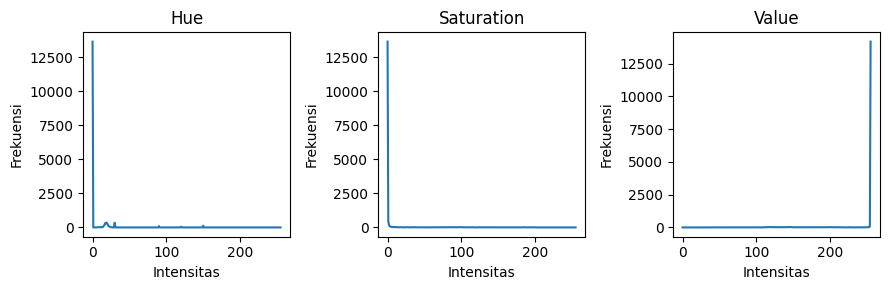

In [ ]:
hsv = cv2.cvtColor((img * 255).astype("uint8"), cv2.COLOR_BGR2HSV)

labels = ["Hue", "Saturation", "Value"]

plt.figure(figsize=(9, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    h = cv2.calcHist([hsv], [i], None, [256], [0,256])
    plt.plot(h)
    plt.title(labels[i])
    plt.xlabel("Intensitas")
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


### Konkatenasi Fitur

In [ ]:
X_train_features = []

for img in X_train:
    lbp = extract_lbp(img)
    print("lbp",lbp[:1])
    c = extract_color_hist(img)
    print("color",c[:1])
    features = np.concatenate([lbp, c])
    X_train_features.append(features)

X_train_features = np.array(X_train_features)

/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
lbp [0.01965332]
color [3.]
lbp [0.0199585]
color [0.]
lbp [0.0177002]
color [1.]
lbp [0.01733398]
color [4.]
lbp [0.019104]
color [0.]
lbp [0.01928711]
color [1.]
lbp [0.01855469]
color [0.]
lbp [0.0211792]
color [3.]
lbp [0.01904297]
color [0.]
lbp [0.01916504]
color [0.]
lbp [0.01898193]
color [0.]
lbp [0.01965332]
color [0.]
lbp [0.01855469]
color [1.]
lbp [0.01940918]
color [0.]
lbp [0.01831055]
color [0.]
lbp [0.01873779]
color [2.]
lbp [0.02038574]
color [1.]
lbp [0.0177002]
color [0.]
lbp [0.0211792]
color [2.]
lbp [0.01751709]
color [1.]
lbp [0.02062988]
color [3.]
lbp [0.01965332]
color [1.]
lbp [0.02056885]
color [1.]
lbp [0.02044678]
color [3.]
lbp [0.0178833]
color [3.]
lbp [0.01989746]
color [0.]
lbp [0.02075195]
color [1.]
lbp [0.01831055]
color [1.]
lbp [0.01953125]
color [4.]
lbp [0.01794434]
color [2.]
lbp [0.01672363]
color [3.]
lbp [0.02081299]
color [1.]
lbp [0.01855469]
color [3.]
lbp [0.01702881]
color [2.]
lbp [

In [ ]:
print(X_train_features[:5])

[[3.66210938e-04 2.25830078e-03 1.77001953e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.54492188e-04 5.00488281e-03 3.35693359e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.10351562e-04 3.60107422e-03 3.96728516e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.10351562e-05 1.52587891e-03 1.09863281e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.54492188e-04 4.39453125e-03 4.21142578e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
X_test_features = []

for img in X_test:
    lbp = extract_lbp(img)
    c = extract_color_hist(img)
    features = np.concatenate([lbp, c])
    X_test_features.append(features)

X_test_features = np.array(X_test_features)

In [ ]:
print(X_test_features[:5])

[[9.76562500e-04 3.54003906e-03 2.68554688e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.15527344e-04 3.78417969e-03 3.54003906e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.83105469e-04 1.83105469e-03 1.03759766e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.83105469e-04 2.01416016e-03 7.32421875e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.10351562e-05 1.09863281e-03 7.93457031e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
